In [1]:
!pip install colour


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi, cos, sin
from colour import Color
import warnings
warnings.filterwarnings("ignore")


In [3]:
#Stole this code from stack overflow dont ask me how it works
def set_axes_equal(ax):
    '''Make axes of 3D plot have equal scale so that spheres appear as spheres,
    cubes as cubes, etc..  This is one possible solution to Matplotlib's
    ax.set_aspect('equal') and ax.axis('equal') not working for 3D.

    Input
      ax: a matplotlib axis, e.g., as output from plt.gca().
    '''

    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    # The plot bounding box is a sphere in the sense of the infinity
    # norm, hence I call half the max range the plot radius.
    plot_radius = 0.5*max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])

In [4]:
def plot_vector(ax,vec,**kwargs):
    
    X = np.array((0))
    Y = np.array((0))
    Z = np.array((0))
    U = np.array((vec[0]))
    V = np.array((vec[1]))
    W = np.array((vec[2]))

    ax.quiver(X, Y, Z, U, V, W,length=1, normalize=False,**kwargs)
    

In [5]:
def plot_vector_list(ax,vec_list,color_list):
    for ii in range(len(vec_list)):
        plot_vector(ax,vec_list[ii],color=color_list[ii].rgb)

In [6]:
def create_trans_vec_list(transformation):
    num_theta = 10
    num_phi = 64
    red = Color("red")
    starting_colors = list(red.range_to(Color("green"),num_theta))
    vec_list = []
    trans_vec_list = []
    color_list = []
    for ii in range(num_theta):
        color_spctrm_ov_phi = list(starting_colors[ii].range_to(Color("white"),num_phi))
        #print(color_spctrm_ov_phi)
        for jj in range(num_phi):
            #spherical coordinates
            theta = -pi*ii/num_theta # Putting a negative sign here so the colors display better
            phi = 2*pi*jj/num_phi
            vec = np.array([sin(theta)*cos(phi),
                            sin(theta)*sin(phi),
                            cos(theta),
                           ])
            color_to_use = color_spctrm_ov_phi[jj]

            vec_list.append(vec)
            color_list.append(color_to_use)
            trans_vec_list.append(transformation@vec)
    return trans_vec_list,vec_list

# Visualizing Linear Transformations

First, let's define our linear transformations. 

In [7]:
A = np.array([
    [1,           0,          0],
    [0,  cos(-pi/4), sin(-pi/4)],
    [0, -sin(-pi/4), cos(-pi/4)]
    ])
B = np.array([
    [3, 0, 0],
    [0, 1, 0],
    [0, 0, 2]
    ])

C = np.array([
    [1,0,0],
    [0,1,0],
    [0,0,0],
])

T = C @ B @ A

In [8]:
print(T)

[[ 3.          0.          0.        ]
 [ 0.          0.70710678 -0.70710678]
 [ 0.          0.          0.        ]]


Qualitatively describe what A, B, and C do

In [9]:
e1 = np.array([1,0,0])
e2 = np.array([0,1,0])
e3 = np.array([0,0,1])


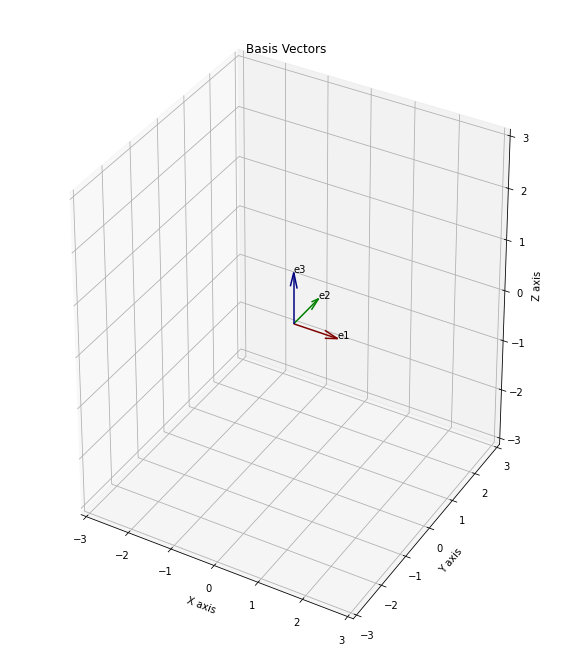

In [10]:
fig = plt.figure(figsize=(10, 12))
ax = fig.gca(projection='3d')
#ax.set_aspect('equal')
ax.set_title('Basis Vectors')
ax.set_xlim([-3,3])
ax.set_ylim([-3,3])
ax.set_zlim([-3,3])
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

plot_vector(ax,e1,color=[.5, 0, 0])
plot_vector(ax,e2,color=[0, .5, 0])
plot_vector(ax,e3,color=[0, 0,.5])


ax.text(1,0,0,'e1')
ax.text(0,1,0,'e2')
ax.text(0,0,1,'e3')
plt.show()

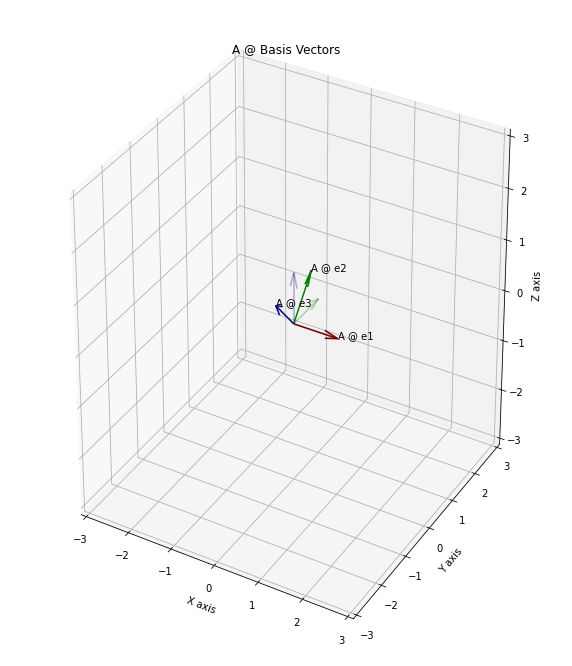

In [11]:
Ae1 = A@e1
Ae2 = A@e2
Ae3 = A@e3

fig = plt.figure(figsize=(10, 12))
ax = fig.gca(projection='3d')
ax.grid()
ax.set_title('A @ Basis Vectors')
ax.set_xlim([-3,3])
ax.set_ylim([-3,3])
ax.set_zlim([-3,3])
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plot_vector(ax,Ae1,color=[.5, 0, 0])
plot_vector(ax,Ae2,color=[0, .5, 0])
plot_vector(ax,Ae3,color=[0, 0,.5])
plot_vector(ax,e1,color=[.5, 0, 0],alpha=.3)
plot_vector(ax,e2,color=[0, .5, 0],alpha=.3)
plot_vector(ax,e3,color=[0, 0,.5],alpha=.3)
ax.text(Ae1[0],Ae1[1],Ae1[2],'A @ e1')
ax.text(Ae2[0],Ae2[1],Ae2[2],'A @ e2')
ax.text(Ae3[0],Ae3[1],Ae3[2],'A @ e3')

plt.show()


### Shear Plot 

In [12]:
trans_vec_list,vec_list = create_trans_vec_list(A)

NameError: name 'color_list' is not defined

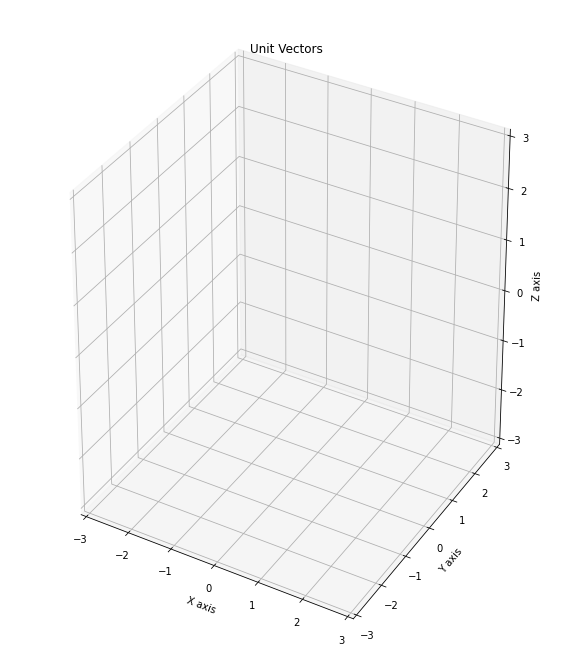

In [13]:
fig = plt.figure(figsize=(10, 12))
ax = fig.gca(projection='3d')
ax.grid()
ax.set_title('Unit Vectors')
ax.set_xlim([-3,3])
ax.set_ylim([-3,3])
ax.set_zlim([-3,3])
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plot_vector_list(ax,vec_list,color_list)
plt.show()

In [ ]:
fig = plt.figure(figsize=(10, 12))
ax = fig.gca(projection='3d')
ax.grid()
ax.set_title('A @ Unit Vectors')
ax.set_xlim([-3,3])
ax.set_ylim([-3,3])
ax.set_zlim([-3,3])
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plot_vector_list(ax,trans_vec_list,color_list)
plt.show()

### Applying B after A

In [ ]:
BAe1 = B@A@e1
BAe2 = B@A@e2
BAe3 = B@A@e3

fig = plt.figure(figsize=(10, 12))
ax = fig.gca(projection='3d')
ax.grid()
ax.set_title('B @ A @ Basis Vectors')
ax.set_xlim([-3,3])
ax.set_ylim([-3,3])
ax.set_zlim([-3,3])
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plot_vector(ax,BAe1,color=[.5, 0, 0])
plot_vector(ax,BAe2,color=[0, .5, 0])
plot_vector(ax,BAe3,color=[0, 0,.5])
plot_vector(ax,Ae1,color=[.5, 0, 0],alpha =.3)
plot_vector(ax,Ae2,color=[0, .5, 0],alpha=.3)
plot_vector(ax,Ae3,color=[0, 0,.5],alpha=.3)
ax.text(BAe1[0],BAe1[1],BAe1[2],'B @ A @ e1')
ax.text(BAe2[0],BAe2[1],BAe2[2],'B @ A @ e2')
ax.text(BAe3[0],BAe3[1],BAe3[2],'B @ A @ e3')

plt.show()

In [ ]:
trans_vec_list,vec_list = create_trans_vec_list(B @ A)
fig = plt.figure(figsize=(10, 12))
ax = fig.gca(projection='3d')
ax.grid()
ax.set_title('B @ A @ Unit Vectors')
ax.set_xlim([-3,3])
ax.set_ylim([-3,3])
ax.set_zlim([-3,3])
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plot_vector_list(ax,trans_vec_list,color_list)
plt.show()

### Applying C B A

In [ ]:
CBAe1 = C@B@A@e1
CBAe2 = C@B@A@e2
CBAe3 = C@B@A@e3

fig = plt.figure(figsize=(10, 12))
ax = fig.gca(projection='3d')
ax.grid()
ax.set_title('C @ B @ A @ Basis Vectors')
ax.set_xlim([-3,3])
ax.set_ylim([-3,3])
ax.set_zlim([-3,3])
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plot_vector(ax,CBAe1,color=[.5, 0, 0])
plot_vector(ax,CBAe2,color=[0, .5, 0])
plot_vector(ax,CBAe3,color=[0, 0,.5])
plot_vector(ax,BAe1,color=[.5, 0, 0],alpha=.3)
plot_vector(ax,BAe2,color=[0, .5, 0],alpha=.3)
plot_vector(ax,BAe3,color=[0, 0,.5],alpha=.3)
ax.text(CBAe1[0],CBAe1[1],CBAe1[2],'C @ B @ A @ e1')
ax.text(CBAe2[0],CBAe2[1],CBAe2[2],'C @ B @ A @ e2')
ax.text(CBAe3[0],CBAe3[1],CBAe3[2],'C @ B @ A @ e3')

plt.show()

In [ ]:
trans_vec_list,vec_list = create_trans_vec_list(C @ B @ A)
fig = plt.figure(figsize=(10, 12))
ax = fig.gca(projection='3d')
ax.grid()
ax.set_title('B @ A @ Unit Vectors')
ax.set_xlim([-3,3])
ax.set_ylim([-3,3])
ax.set_zlim([-3,3])
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plot_vector_list(ax,trans_vec_list,color_list)
plt.show()


In [ ]:
C@B@A

Questions:

Is A invertible?

Is BA invertible?

Is CBA invertible?